In [1]:
from sklearn.ensemble import RandomForestRegressor
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('./training.csv')
test_data = pd.read_csv('./testing.csv')

y_train = train_data['Appliances'].values
X_train = train_data.values[:,2:30]

y_test = test_data['Appliances'].values
X_test = test_data.values[:,2:30]

In [3]:
clf = RandomForestRegressor(n_estimators=100, max_depth=None)

In [4]:
clf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [5]:
y_pred = clf.predict(X_test)

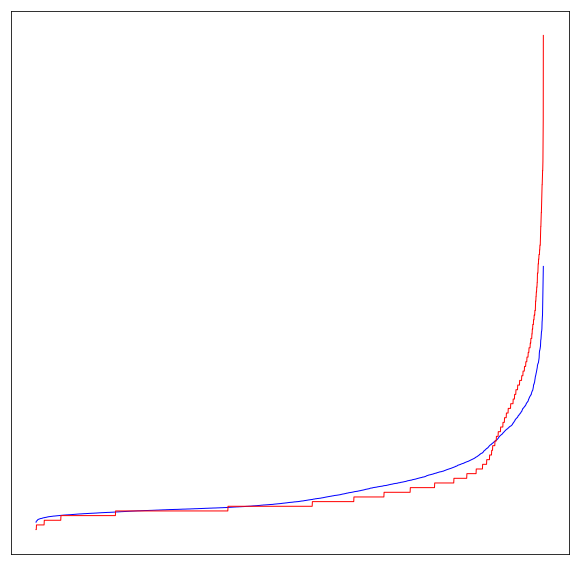

In [6]:
plt.figure(figsize=(10,10))
plt.plot(np.arange(len(y_pred)), np.sort(y_pred), color='blue', linewidth=1)

plt.plot(np.arange(len(y_test)), np.sort(y_test), color='red', linewidth=1)

plt.xticks(())
plt.yticks(())

plt.show()

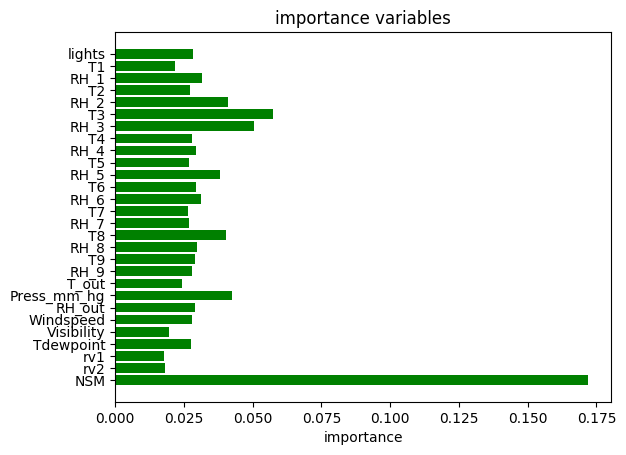

In [7]:
plt.rcdefaults()
fig, ax = plt.subplots()

f_im = clf.feature_importances_.tolist()
col_list = test_data.columns.values[2:30].tolist()
y_pos = np.arange(len(col_list))
ax.barh(y_pos, f_im, align='center', color='green')
ax.set_yticks(y_pos)
ax.set_yticklabels(col_list)
ax.invert_yaxis()
ax.set_xlabel('importance')
ax.set_title('importance variables')

plt.show()


In [8]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def cal_errors(y_test,y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rms = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    print('MAE = {}, RMS = {}, R2 = {}, MAPE = {}'.format(mae,rms,r2,mape))

cal_errors(y_test, y_pred)

MAE = 32.918268450932686, RMS = 4948.3477392538525, R2 = 0.5206636623125983, MAPE = 32.43703024632021
